# The morph.py library was used in the last two courses at UFABC:

## Processamento Digital de Imagens - PDI - 2023.1
## Visão Computacional e Processamento Imagens - VCPI - 2022.1

# Refs:

* [livro](https://www.amazon.com.br/Hands-Morphological-Processing-Edward-Dougherty/dp/081944720X) - Dougherty and Lotufo (2003)
* https://github.com/robertoalotufo/ia870
* https://github.com/robertoalotufo/ia898
* https://github.com/robertoalotufo/ia870p3
* [ftp://ftp.dca.fee.unicamp.br/pub/cik/morph/morph_doc0.14.pdf](ftp://ftp.dca.fee.unicamp.br/pub/cik/morph/morph_doc0.14.pdf)
* https://www.researchgate.net/publication/3922632_Toolbox_of_image_processing_for_numerical_Python
* https://pythonhosted.org/pymorph/


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [6]:
!wget https://raw.githubusercontent.com/fzampirolli/morph/refs/heads/main/morph.py

--2024-09-27 10:38:26--  https://raw.githubusercontent.com/fzampirolli/morph/refs/heads/main/morph.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42991 (42K) [text/plain]
Saving to: ‘morph.py’

morph.py            100%[===================>]  41.98K  --.-KB/s    in 0.01s   

2024-09-27 10:38:26 (3.54 MB/s) - ‘morph.py’ saved [42991/42991]



In [7]:
from morph import *

In [8]:
mm.install(['opencv-python'])

In [9]:
print(cv2.__version__)

4.10.0


In [10]:
help(mm)

Help on class mm in module morph:

class mm(builtins.object)
 |  A helper class for image processing tasks.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  blob(f, op='area', border=1, precision=0.01, show='True')
 |      This function will be calculate topology of each connect component
 |      input:
 |        - f: input image
 |        - op: 'area', 'perimeter', etc [default='area']
 |        - border: border of lines [default=1]
 |        - precision: precision of polygonon [default=0.01]
 |        - show=True, return image, else, return measure
 |      output:
 |        - y: image with op or measure
 |  
 |  blobAll(f, border=1, precision=0.01, show='False')
 |      This function will be calculate topology of each connect component
 |      input:
 |        - f: input image
 |        - border: border of lines [default=1]
 |        - precision: precision of polygonon [default=0.01]
 |        - sho

In [11]:
help(mm.ero)

Help on function ero in module morph:

ero(f, Bc=array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8))
    This function will create an erosion of f by Bc
    input:
     - f: input image
     - Bc: structuring element
    output:
     - y: result of filter



In [12]:
import numpy as np
f = np.random.random((5, 10))*10
f = f.astype(int)
print(f)

[[0 7 3 2 0 5 9 0 9 5]
 [1 1 7 7 3 5 1 4 7 7]
 [3 0 9 7 3 9 2 9 4 4]
 [5 1 4 7 7 5 4 1 4 5]
 [7 8 6 8 7 3 0 7 8 7]]


In [13]:
B = np.array([[1,1,1],[0,1,0],[0,0,0]])
B=np.array(B).astype('int8')
print(B)

[[1 1 1]
 [0 1 0]
 [0 0 0]]


In [14]:
g=mm.ero0(f,B)
g[:, [0, -1]] = g[[0, -1], :] = 0 # zero in border
print(g)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 1 3 3 1 1 1 4 0]
 [0 0 0 3 3 2 2 1 4 0]
 [0 0 0 0 0 0 0 0 0 0]]


Note that it is necessary to change the code `ero0` to return the same result as Figure 14 in the paper

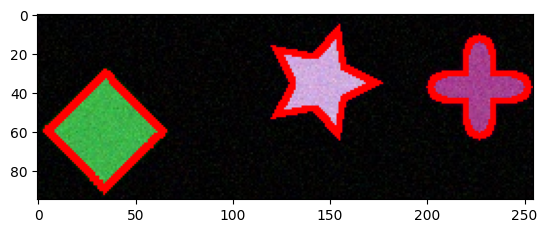

In [15]:
# download morph.py from GitHub
# !wget https://raw.githubusercontent.com/fzampirolli/morph/main/morph.py

from morph import *
mm.install()
img = mm.read('https://www.dropbox.com/s/ekjbzp14jt90bfq/00004.jpg?dl=1')
img = img[25:120,30:285] # cropping the image - Figure 2-(a)
th = mm.threshold(mm.gray(img),30)
mm.show(img, th-mm.ero(th, np.ones((7,7), dtype='uint8'))) # Figure 2-(b)